In [ ]:
import jax
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to check if a point is inside an ellipse
def is_inside_ellipse(x, y, center_x, center_y, a, b, theta):
    dx = x - center_x
    dy = y - center_y
    
    # Rotate the point by -theta (to make the ellipse axis-aligned)
    x_rot = dx * np.cos(-theta) - dy * np.sin(-theta)
    y_rot = dx * np.sin(-theta) + dy * np.cos(-theta)
    
    # Check if the rotated point is inside the axis-aligned ellipse
    return (x_rot**2 / a**2) + (y_rot**2 / b**2) <= 1

# Function to visualize the domain
def visualize_domain(domain_matrix):
    plt.figure(figsize=(12, 6))
    plt.imshow(~domain_matrix, cmap='gray', interpolation='nearest')
    plt.title('Domain with Ellipses')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to generate domain with ellipses in a lattice arrangement ensuring no border overlap
def generate_lattice_domain_desired_porosity(rows, cols, a, b, theta, desired_porosity):
    matrix = np.full((rows, cols), True)
    centers = []
    
    # Effective dimensions considering spacing
    eff_a = a + 1
    eff_b = b + 1
    
    # Calculate the bounds considering the ellipse dimensions and orientation
    min_center_row = max(a, b) + 1
    max_center_row = rows - min_center_row
    min_center_col = max(a, b) + 1
    max_center_col = cols - min_center_col
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a lattice while maintaining the desired porosity
    for i in range((min_center_row + eff_b) // (2 * eff_b), (max_center_row + eff_b) // (2 * eff_b) + 1):
        for j in range((min_center_col + eff_a) // (2 * eff_a), (max_center_col + eff_a) // (2 * eff_a) + 1):
            # Shift alternate rows for a triangular lattice
            shift = eff_a if i % 2 == 1 else 0
            center_row = i * 2 * eff_b
            center_col = j * 2 * eff_a + shift
            
            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

# Parameters for ellipses
rows, cols = 200, 350  # Domain size
a = 10  # Semi-major axis
b = 5   # Semi-minor axis
theta = np.pi / 4  # Angle of orientation in radians
desired_porosity = 0.6  # Example porosity value

# Generate and visualize domain with desired porosity in a lattice arrangement
domain_lattice_porosity = generate_lattice_domain_desired_porosity(rows, cols, a, b, theta, desired_porosity)
visualize_domain(domain_lattice_porosity)


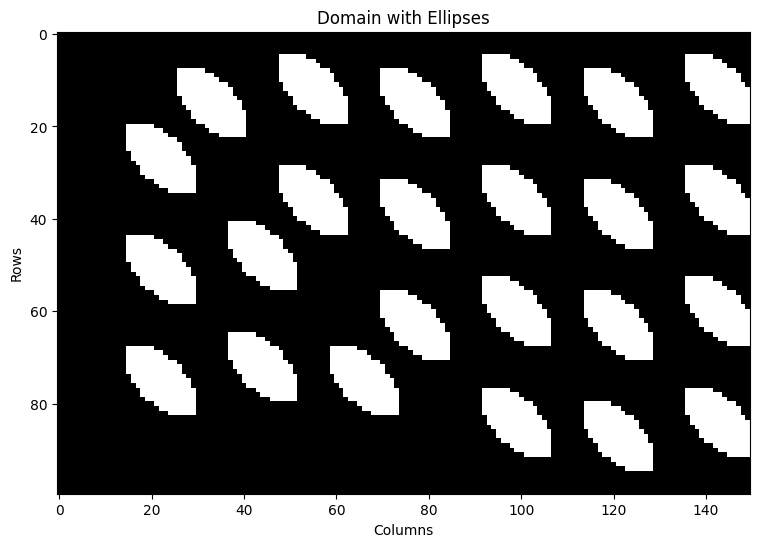

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if a point is inside an ellipse
def is_inside_ellipse(x, y, center_x, center_y, a, b, theta):
    dx = x - center_x
    dy = y - center_y
    
    # Rotate the point by -theta (to make the ellipse axis-aligned)
    x_rot = dx * np.cos(-theta) - dy * np.sin(-theta)
    y_rot = dx * np.sin(-theta) + dy * np.cos(-theta)
    
    # Check if the rotated point is inside the axis-aligned ellipse
    return (x_rot**2 / a**2) + (y_rot**2 / b**2) <= 1

# Function to visualize the domain
def visualize_domain(domain_matrix):
    plt.figure(figsize=(12, 6))
    plt.imshow(~domain_matrix, cmap='gray', interpolation='nearest')
    plt.title('Domain with Ellipses')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to generate domain with ellipses in a zigzag arrangement ensuring no border overlap
def generate_zigzag_lattice_domain_desired_porosity(rows, cols, a, b, theta, desired_porosity):
    matrix = np.full((rows, cols), True)
    centers = []
    
    # Effective dimensions considering spacing
    eff_a = a + 1
    eff_b = b + 1
    
    # Calculate the bounds considering the ellipse dimensions and orientation
    min_center_row = max(a, b) + 1
    max_center_row = rows - min_center_row
    min_center_col = max(a, b) + 1
    max_center_col = cols - min_center_col
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a zigzag lattice while maintaining the desired porosity
    for i in range((min_center_row + eff_b) // (2 * eff_b), (max_center_row + eff_b) // (2 * eff_b) + 1):
        for j in range((min_center_col + eff_a) // (2 * eff_a), (max_center_col + eff_a) // (2 * eff_a) + 1):
            # Shift alternate rows for a triangular lattice and add a vertical displacement for zigzag
            shift = eff_a if i % 2 == 1 else 0
            vertical_shift = (eff_b // 2) if j % 2 == 1 else 0
            center_row = i * 2 * eff_b + vertical_shift
            center_col = j * 2 * eff_a + shift
            
            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

# Parameters for ellipses
rows, cols = 100, 150  # Domain size
a = 10  # Semi-major axis
b = 5   # Semi-minor axis
theta = np.pi / 4  # Angle of orientation in radians
desired_porosity = 0.6  # Example porosity value

# Generate and visualize domain with desired porosity in a zigzag lattice arrangement
domain_zigzag_porosity = generate_zigzag_lattice_domain_desired_porosity(rows, cols, a, b, theta, desired_porosity)
visualize_domain(domain_zigzag_porosity)


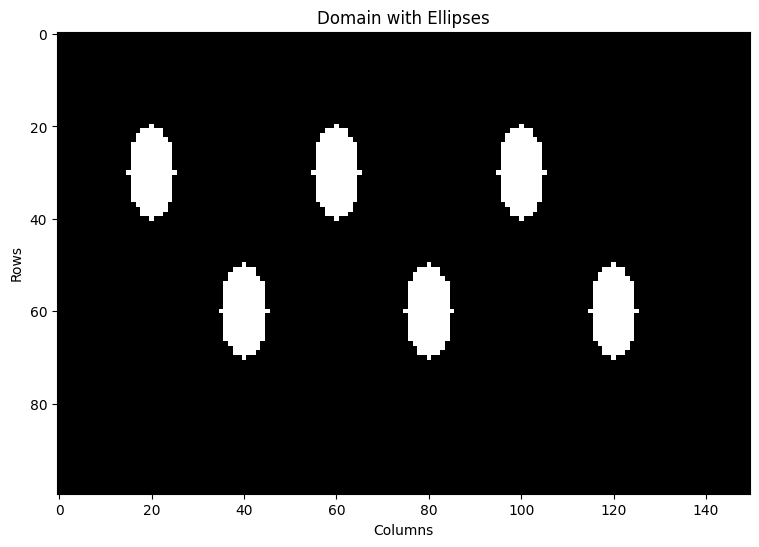

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to check if a point is inside an ellipse
def is_inside_ellipse(x, y, center_x, center_y, a, b, theta):
    dx = x - center_x
    dy = y - center_y
    
    # Rotate the point by -theta (to make the ellipse axis-aligned)
    x_rot = dx * np.cos(-theta) - dy * np.sin(-theta)
    y_rot = dx * np.sin(-theta) + dy * np.cos(-theta)
    
    # Check if the rotated point is inside the axis-aligned ellipse
    return (x_rot**2 / a**2) + (y_rot**2 / b**2) <= 1

# Function to visualize the domain
def visualize_domain(domain_matrix):
    plt.figure(figsize=(12, 6))
    plt.imshow(~domain_matrix, cmap='gray', interpolation='nearest')
    plt.title('Domain with Ellipses')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to generate domain with ellipses ensuring no border overlap
def generate_seamless_domain_ellipses_strict_no_overlap(rows, cols, a, b, theta, spacing=None):
    matrix = np.full((rows, cols), True)
    centers = []
    
    if spacing is None:
        spacing = max(a, b)
    
    # Effective dimensions considering spacing
    eff_a = a + spacing
    eff_b = b + spacing
    
    # Calculate the bounds considering the ellipse dimensions and orientation
    min_center_row = max(a, b) + 1  # Adding 1 to ensure strict non-overlap
    max_center_row = rows - min_center_row
    min_center_col = max(a, b) + 1
    max_center_col = cols - min_center_col
    
    # Generate ellipse centers in a lattice
    for i in range((min_center_row + eff_b) // (2 * eff_b), (max_center_row + eff_b) // (2 * eff_b) + 1):
        for j in range((min_center_col + eff_a) // (2 * eff_a), (max_center_col + eff_a) // (2 * eff_a) + 1):
            # Shift alternate rows for a triangular lattice
            shift = eff_a if i % 2 == 1 else 0
            center_row = i * 2 * eff_b
            center_col = j * 2 * eff_a + shift
            
            # Check for overlaps with existing ellipses and domain boundaries
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            within_domain = (min_center_row <= center_row <= max_center_row) and \
                            (min_center_col <= center_col <= max_center_col)
            
            if not overlap and within_domain:
                centers.append((center_row, center_col))
    
    # Set the matrix values inside the ellipses to False
    for center_row, center_col in centers:
        for i in range(rows):
            for j in range(cols):
                if is_inside_ellipse(j, i, center_col, center_row, a, b, theta):
                    matrix[i][j] = False
    
    return matrix

# Parameters for ellipses
new_rows, new_cols = 100, 150  # Domain size
a = 10  # Semi-major axis
b = 5   # Semi-minor axis
theta = np.pi / 4  # Angle of orientation in radians

# Generate and visualize domain with ellipses, strictly not overlapping borders
domain_seamless_ellipses_strict_no_overlap = generate_seamless_domain_ellipses_strict_no_overlap(
    new_rows, new_cols, a, b, theta
)
visualize_domain(domain_seamless_ellipses_strict_no_overlap)

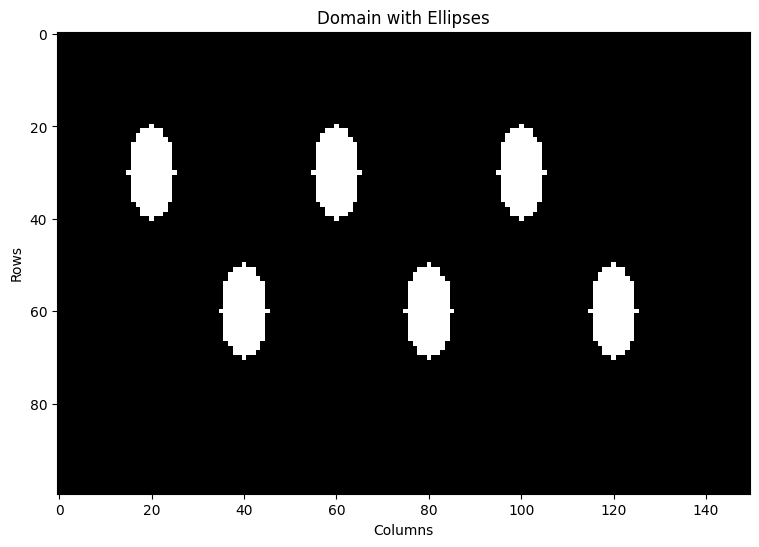

In [8]:
def generate_seamless_domain_ellipses_strict_no_overlap(rows, cols, a, b, theta, desired_porosity, spacing=None):
    matrix = np.full((rows, cols), True)
    centers = []
    
    if spacing is None:
        spacing = max(a, b)
    
    # Effective dimensions considering spacing
    eff_a = a + spacing
    eff_b = b + spacing
    
    # Calculate the bounds considering the ellipse dimensions and orientation
    min_center_row = max(a, b) + 1
    max_center_row = rows - min_center_row
    min_center_col = max(a, b) + 1
    max_center_col = cols - min_center_col
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a lattice while maintaining the desired porosity
    for i in range((min_center_row + eff_b) // (2 * eff_b), (max_center_row + eff_b) // (2 * eff_b) + 1):
        for j in range((min_center_col + eff_a) // (2 * eff_a), (max_center_col + eff_a) // (2 * eff_a) + 1):
            # Shift alternate rows for a triangular lattice
            shift = eff_a if i % 2 == 1 else 0
            center_row = i * 2 * eff_b
            center_col = j * 2 * eff_a + shift
            
            # Check for overlaps with existing ellipses and domain boundaries
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            within_domain = (min_center_row <= center_row <= max_center_row) and \
                            (min_center_col <= center_col <= max_center_col)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and within_domain and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

# Parameters for ellipses
rows, cols = 100, 150  # Domain size
a = 10  # Semi-major axis
b = 5   # Semi-minor axis
theta = np.pi / 2  # Angle of orientation in radians
desired_porosity = 0.6
# Example porosity value

# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_seamless_ellipses_strict_no_overlap = generate_seamless_domain_ellipses_strict_no_overlap(
    rows, cols, a, b, theta, desired_porosity
)
visualize_domain(domain_seamless_ellipses_strict_no_overlap)

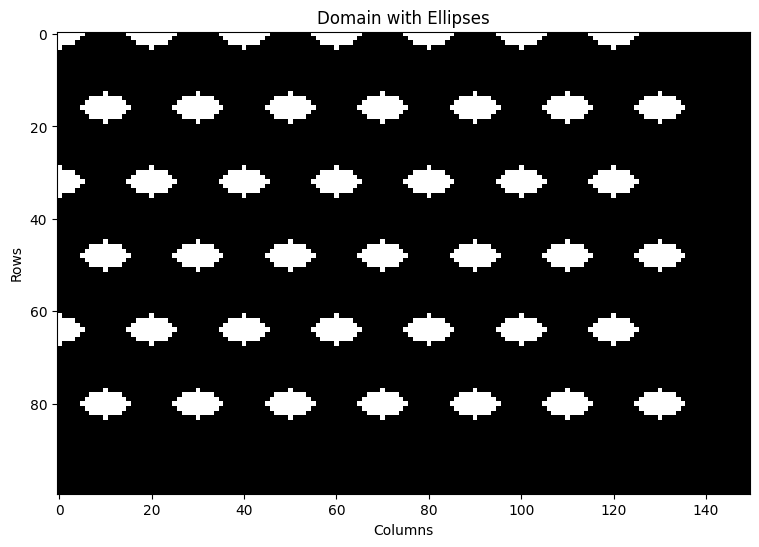

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if a point is inside an ellipse
def is_inside_ellipse(x, y, center_x, center_y, a, b, theta):
    dx = x - center_x
    dy = y - center_y
    
    # Rotate the point by -theta (to make the ellipse axis-aligned)
    x_rot = dx * np.cos(-theta) - dy * np.sin(-theta)
    y_rot = dx * np.sin(-theta) + dy * np.cos(-theta)
    
    # Check if the rotated point is inside the axis-aligned ellipse
    return (x_rot**2 / a**2) + (y_rot**2 / b**2) <= 1

# Function to visualize the domain
def visualize_domain(domain_matrix):
    plt.figure(figsize=(12, 6))
    plt.imshow(~domain_matrix, cmap='gray', interpolation='nearest')
    plt.title('Domain with Ellipses')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Updated function to generate domain with ellipses ensuring no border overlap and desired porosity
def generate_seamless_domain_ellipses_strict_no_overlap(rows, cols, a, b, theta, desired_porosity, spacing=None):
    matrix = np.full((rows, cols), True)
    centers = []
    
    if spacing is None:
        spacing = max(a, b)
    
    # Effective dimensions considering spacing
    eff_a = a + spacing
    eff_b = b + spacing
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a lattice while maintaining the desired porosity
    for i in range((2*a) // (2 * eff_b), rows // (2 * eff_b)):
        for j in range((2*a) // (2 * eff_a), cols // (2 * eff_a)):
            # Shift alternate rows for a triangular lattice
            shift = eff_a if i % 2 == 1 else 0
            center_row = i * 2 * eff_b
            center_col = j * 2 * eff_a + shift
            
            # Check for overlaps with existing ellipses and domain boundaries
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            within_domain = (center_row <= rows) and (center_col <= cols)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and within_domain and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

# Parameters for ellipses
rows, cols = 100, 150  # Domain size
a = 5  # Semi-major axis
b = 3   # Semi-minor axis
theta = 0 # Angle of orientation in radians
desired_porosity = 0.1  # Example porosity value

# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_seamless_ellipses_strict_no_overlap = generate_seamless_domain_ellipses_strict_no_overlap(
    rows, cols, a, b, theta, desired_porosity
)
visualize_domain(domain_seamless_ellipses_strict_no_overlap)


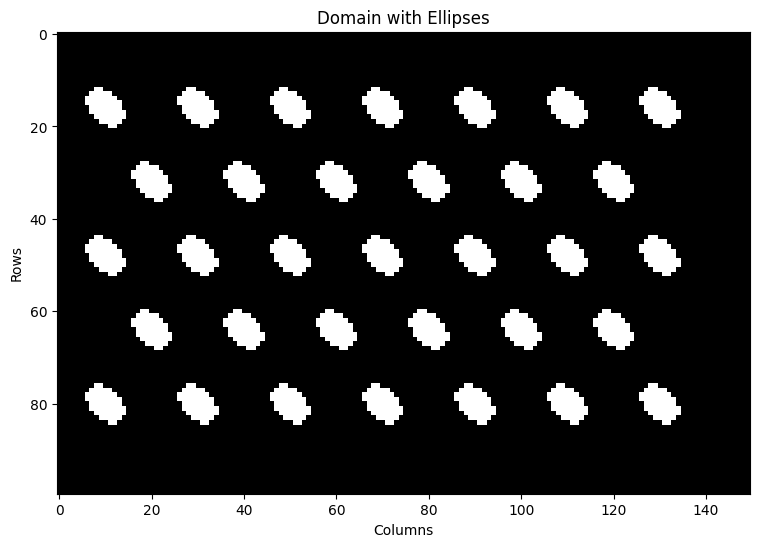

In [10]:
def generate_tilable_domain_ellipses_no_border_overlap(rows, cols, a, b, theta, desired_porosity, spacing=None):
    matrix = np.full((rows, cols), True)
    centers = []
    
    if spacing is None:
        spacing = max(a, b)
    
    # Effective dimensions considering spacing
    eff_a = a + spacing
    eff_b = b + spacing
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a lattice while maintaining the desired porosity
    for i in range(rows // (2 * eff_b)):
        for j in range(cols // (2 * eff_a)):
            # Shift alternate rows for a triangular lattice
            shift = eff_a if i % 2 == 1 else 0
            center_row = i * 2 * eff_b
            center_col = j * 2 * eff_a + shift
            
            # Check if ellipse center is too close to the border
            too_close_to_border = (
                center_row - b < 0 or
                center_row + b > rows or
                center_col - a < 0 or
                center_col + a > cols
            )
            
            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and not too_close_to_border and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

# Parameters for ellipses
rows, cols = 100, 150  # Domain size
a = 5  # Semi-major axis
b = 3   # Semi-minor axis
theta = np.pi / 4  # Angle of orientation in radians
desired_porosity = 0.7  # Example porosity value

# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_tilable_ellipses_no_border_overlap = generate_tilable_domain_ellipses_no_border_overlap(
    rows, cols, a, b, theta, desired_porosity
)
visualize_domain(domain_tilable_ellipses_no_border_overlap)


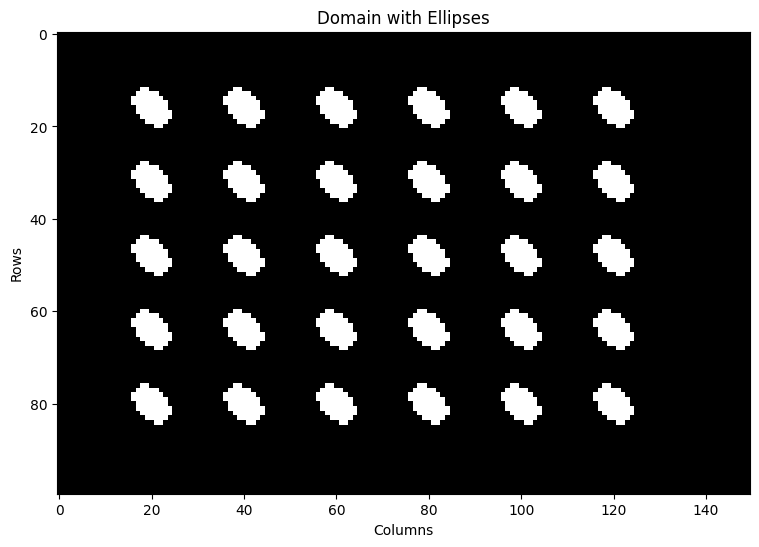

In [11]:
def generate_square_lattice_domain_no_border_overlap(rows, cols, a, b, theta, desired_porosity, spacing=None):
    matrix = np.full((rows, cols), True)
    centers = []
    
    if spacing is None:
        spacing = max(a, b)
    
    # Effective dimensions considering spacing
    eff_a = a + spacing
    eff_b = b + spacing
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a square lattice while maintaining the desired porosity
    for i in range(rows // (2 * eff_b)):
        for j in range(cols // (2 * eff_a)):
            center_row = i * 2 * eff_b
            center_col = j * 2 * eff_a
            
            # Check if ellipse center is too close to the border
            too_close_to_border = (
                center_row - b < 0 or
                center_row + b > rows or
                center_col - a < 0 or
                center_col + a > cols
            )
            
            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and not too_close_to_border and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

# Parameters for ellipses
rows, cols = 100, 150  # Domain size
a = 5  # Semi-major axis
b = 3   # Semi-minor axis
theta = np.pi / 4  # Angle of orientation in radians
desired_porosity = 0.7  # Example porosity value

# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_tilable_ellipses_no_border_overlap = generate_square_lattice_domain_no_border_overlap(
    rows, cols, a, b, theta, desired_porosity
)
visualize_domain(domain_tilable_ellipses_no_border_overlap)

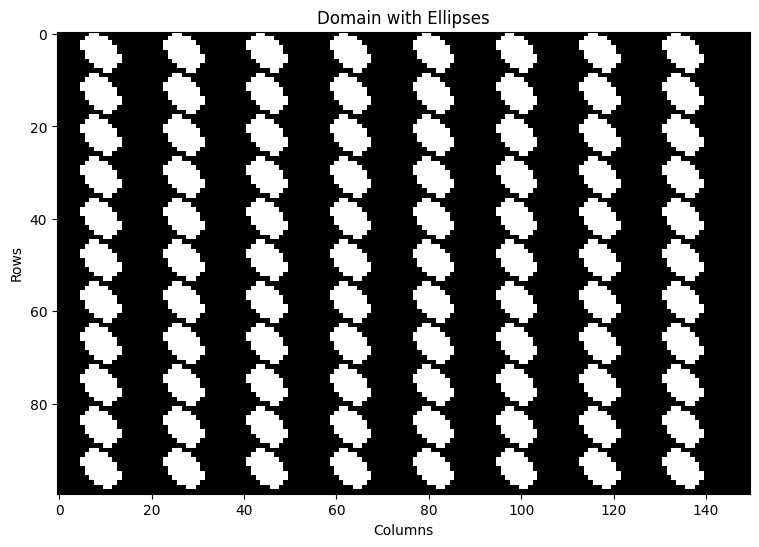

In [12]:
def generate_tilable_domain_ellipses_desired_porosity(rows, cols, a, b, theta, desired_porosity):
    matrix = np.full((rows, cols), True)
    centers = []
    
    # Calculate the area of a single ellipse
    area_ellipse = np.pi * a * b
    
    # Define the total area of the domain
    area_domain = rows * cols
    
    # Calculate the total acceptable area of ellipses in the domain
    total_area_ellipses_acceptable = (1 - desired_porosity) * area_domain
    
    # Estimate the number of ellipses that can fit into the domain while maintaining the desired porosity
    num_ellipses = int(total_area_ellipses_acceptable // area_ellipse)
    
    # Calculate the number of ellipses in the row and column directions based on a square lattice arrangement
    num_ellipses_row = int(np.sqrt(num_ellipses * (cols/rows)))
    num_ellipses_col = num_ellipses // num_ellipses_row
    
    # Calculate the spacing between the ellipses in the row and column directions
    spacing_row = rows // num_ellipses_row
    spacing_col = cols // num_ellipses_col
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a square lattice while maintaining the desired porosity
    for i in range(num_ellipses_row):
        for j in range(num_ellipses_col):
            center_row = i * spacing_row + spacing_row // 2
            center_col = j * spacing_col + spacing_col // 2
            
            # Check if ellipse center is too close to the border
            too_close_to_border = (
                center_row - b < 0 or
                center_row + b > rows or
                center_col - a < 0 or
                center_col + a > cols
            )
            
            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and not too_close_to_border and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix


rows, cols = 100, 150  # Domain size
a = 5  # Semi-major axis
b = 3   # Semi-minor axis
theta = np.pi / 4  # Angle of orientation in radians
desired_porosity = 0.7  # Example porosity value

# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_tilable_ellipses_no_border_overlap = generate_tilable_domain_ellipses_desired_porosity(
    rows, cols, a, b, theta, desired_porosity
)
visualize_domain(domain_tilable_ellipses_no_border_overlap)


In [8]:
def generate_tilable_domain_ellipses_triangular_lattice(rows, cols, a, b, theta, desired_porosity):
    matrix = np.full((rows, cols), True)
    centers = []
    
    # Calculate the area of a single ellipse
    area_ellipse = np.pi * a * b
    
    # Define the total area of the domain
    area_domain = rows * cols
    
    # Calculate the total acceptable area of ellipses in the domain
    total_area_ellipses_acceptable = (1 - desired_porosity) * area_domain
    
    # Estimate the number of ellipses that can fit into the domain while maintaining the desired porosity
    num_ellipses = int(total_area_ellipses_acceptable // area_ellipse)
    
    # Calculate the number of ellipses in the row and column directions based on a square lattice arrangement
    num_ellipses_row = int(np.sqrt(num_ellipses * (cols/rows)))
    num_ellipses_col = num_ellipses // num_ellipses_row
    
    # Calculate the spacing between the ellipses in the row and column directions
    spacing_row = rows // num_ellipses_row
    spacing_col = cols // num_ellipses_col
    
    # Helper function to calculate the current porosity of the domain
    def calculate_porosity(mat):
        return np.sum(mat) / (rows * cols)
    
    current_porosity = calculate_porosity(matrix)
    
    # Generate ellipse centers in a triangular lattice while maintaining the desired porosity
    for i in range(num_ellipses_row):
        for j in range(num_ellipses_col):
            # Shift alternate columns for a triangular lattice
            shift = spacing_row // 2 if j % 2 == 1 else 0
            center_row = i * spacing_row + spacing_row // 2 + shift
            center_col = j * spacing_col + spacing_col // 2
            
            # Check if ellipse center is too close to the border
            too_close_to_border = (
                center_row - b < 0 or
                center_row + b > rows or
                center_col - a < 0 or
                center_col + a > cols
            )
            
            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a*2, b*2, theta) for x in centers)
            
            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = matrix.copy()
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False
            
            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and not too_close_to_border and calculate_porosity(temp_matrix) >= desired_porosity:
                matrix = temp_matrix
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)
        
    return matrix

rows, cols = 200, 300  # Domain size
a = 5  # Semi-major axis
b = 3   # Semi-minor axis
theta = 0 # Angle of orientation in radians
desired_porosity = 0.2  # Example porosity value

# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_tilable_ellipses_no_border_overlap = generate_tilable_domain_ellipses_triangular_lattice(
    rows, cols, a, b, theta, desired_porosity
)
visualize_domain(domain_tilable_ellipses_no_border_overlap)

KeyboardInterrupt: 

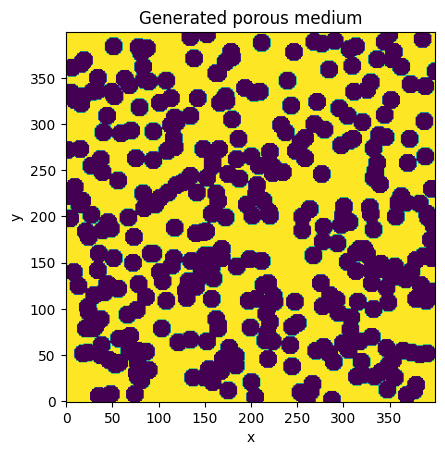

In [15]:
import porespy as ps
import matplotlib.pyplot as plt

# Parameters
shape = [400, 400]  # Shape of the image
radius = 10  # Radius of the spheres
porosity = 0.5  # Desired porosity

# Generate image of porous medium
im = ps.generators.overlapping_spheres(shape, radius, porosity)

# Visualize
plt.imshow(im, origin='lower')
plt.title('Generated porous medium')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


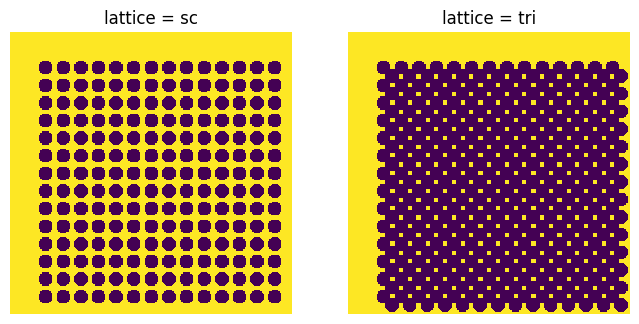

In [19]:
import matplotlib.pyplot as plt
import porespy as ps


fig, ax = plt.subplots(1, 2, figsize=[8, 4])
s = 25
o = 50
L='sc'
r = 10
im1 = ps.generators.lattice_spheres(shape=shape, r=r, spacing=s, offset=o, lattice=L)

ax[0].imshow(im1, interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'lattice = {L}')

L='tri'
im2 = ps.generators.lattice_spheres(shape=shape, r=r, spacing=s, offset=o, lattice=L)

ax[1].imshow(im2, interpolation='none')
ax[1].axis(False)
ax[1].set_title(f'lattice = {L}');

In [11]:
import numpy as np

import matplotlib.pyplot as plt
import jax.numpy as jnp

import jax
@jax.jit
def is_inside_ellipse(x, y, center_x, center_y, a, b, theta):
    dx = x - center_x
    dy = y - center_y

    # Rotate the point by -theta (to make the ellipse axis-aligned)
    x_rot = dx * jnp.cos(-theta) - dy * jnp.sin(-theta)
    y_rot = dx * jnp.sin(-theta) + dy * jnp.cos(-theta)

    # Check if the rotated point is inside the axis-aligned ellipse
    return (x_rot**2 / a** 2) + (y_rot ** 2 / b ** 2) <= 1


# Function to visualize the domain
def visualize_domain(domain_matrix):
    plt.figure(figsize=(12, 6))
    plt.imshow(~domain_matrix, cmap='gray', interpolation='nearest')
    plt.title('Domain with Ellipses')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

@jax.jit
def calculate_porosity(mat,rows,cols):
    return jnp.sum(mat) / (rows * cols)
    
@jax.jit
def generate_tilable_domain_ellipses_triangular_lattice(rows, cols, a, b, theta, desired_porosity):
    matrix = jnp.full((rows, cols), True)
    centers = []

    # Calculate the area of a single ellipse
    area_ellipse = jnp.pi * a * b

    # Define the total area of the domain
    area_domain = rows * cols

    # Calculate the total acceptable area of ellipses in the domain
    total_area_ellipses_acceptable = (1 - desired_porosity) * area_domain

    # Estimate the number of ellipses that can fit into the domain while maintaining the desired porosity
    num_ellipses = int(total_area_ellipses_acceptable // area_ellipse)

    # Calculate the number of ellipses in the row and column directions based on a square lattice arrangement
    num_ellipses_row = int(jnp.sqrt(num_ellipses * (cols / rows)))
    num_ellipses_col = num_ellipses // num_ellipses_row

    # Calculate the spacing between the ellipses in the row and column directions
    spacing_row = rows // num_ellipses_row
    spacing_col = cols // num_ellipses_col
    

    current_porosity = calculate_porosity(matrix)

    # Generate ellipse centers in a triangular lattice while maintaining the desired porosity
    for i in range(num_ellipses_row):
        for j in range(num_ellipses_col):
            # Shift alternate columns for a triangular lattice
            shift = spacing_row // 2 if j % 2 == 1 else 0
            center_row = i * spacing_row + spacing_row // 2 + shift
            center_col = j * spacing_col + spacing_col // 2

            # Check if ellipse center is too close to the border
            too_close_to_border = (
                    center_row - b < 0 or
                    center_row + b > rows or
                    center_col - a < 0 or
                    center_col + a > cols
            )

            # Check for overlaps with existing ellipses
            overlap = any(is_inside_ellipse(center_col, center_row, x[1], x[0], a * 2, b * 2, theta) for x in centers)

            # Temporary matrix to check the porosity if the ellipse is added
            temp_matrix = np.array(matrix)
            for i_r in range(rows):
                for j_c in range(cols):
                    if is_inside_ellipse(j_c, i_r, center_col, center_row, a, b, theta):
                        temp_matrix[i_r][j_c] = False

            # Check if adding the ellipse would exceed the desired porosity
            if not overlap and not too_close_to_border and calculate_porosity(temp_matrix,rows,cols) >= desired_porosity:
                matrix = jnp.array(temp_matrix)
                centers.append((center_row, center_col))
                current_porosity = calculate_porosity(matrix)

    return matrix

# 
# rows, cols = 200, 300  # Domain size
# a = 5  # Semi-major axis
# b = 3  # Semi-minor axis
# theta = 0  # Angle of orientation in radians
# desired_porosity = 0.2  # Example porosity value
# 
# # Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
# domain_tilable_ellipses_no_border_overlap = generate_tilable_domain_ellipses_triangular_lattice(
#     rows, cols, a, b, theta, desired_porosity
# )
# visualize_domain(domain_tilable_ellipses_no_border_overlap)

In [13]:


# Generate and visualize domain with ellipses, strictly not overlapping borders and desired porosity
domain_tilable_ellipses_no_border_overlap = generate_tilable_domain_ellipses_triangular_lattice(
    200, 300, 5, 3, 0, 0.2
)
visualize_domain(domain_tilable_ellipses_no_border_overlap)

TypeError: Shapes must be 1D sequences of concrete values of integer type, got (Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>, Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>).
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.
The error occurred while tracing the function generate_tilable_domain_ellipses_triangular_lattice at /tmp/ipykernel_974/4252674841.py:33 for jit. This concrete value was not available in Python because it depends on the value of the argument rows.
The error occurred while tracing the function generate_tilable_domain_ellipses_triangular_lattice at /tmp/ipykernel_974/4252674841.py:33 for jit. This concrete value was not available in Python because it depends on the value of the argument cols.

## Domain Definition

(500, 200)
(500, 600)
(500, 800)
0.42756


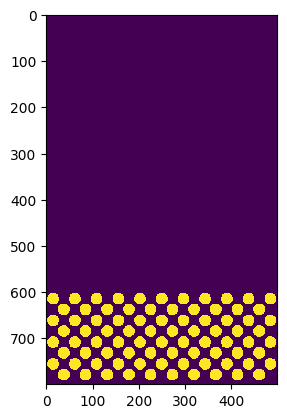

In [99]:

import porespy as ps
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
shape = [500,200]



r = 12.75 
o = 1.25*r

s = 3.75*r

im  = ~ps.generators.lattice_spheres(shape=shape, r=r,spacing=s, offset=o, lattice='tri')
matrix = np.array(im)
print(matrix.shape)
teste = np.full([500,600], False)


matrix = np.hstack((teste,matrix))
print(teste.shape)

print(matrix.shape)



ax.imshow(matrix.transpose(), interpolation='none')
porosity = im.sum()/(shape[0]*shape[1])
print(porosity)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


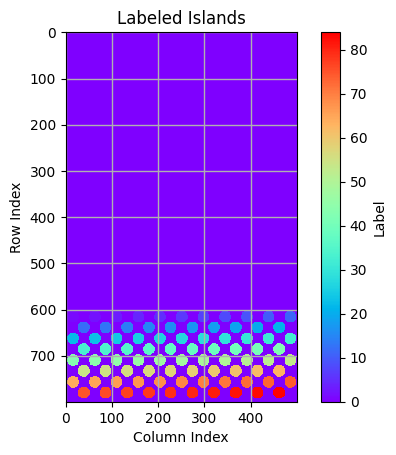

In [103]:
def label_islands(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = [[0] * cols for _ in range(rows)]
    current_label = 0
    
    def dfs(i, j, label):
        stack = [(i, j)]
        while stack:
            x, y = stack.pop()
            if (0 <= x < rows and 0 <= y < cols and 
                matrix[x][y] and labels[x][y] == 0):
                labels[x][y] = label
                for nx, ny in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]:
                    stack.append((nx, ny))
                
    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] and labels[i][j] == 0:
                current_label += 1  # Increment label for a new island
                dfs(i, j, current_label)
    
    return labels

import matplotlib.pyplot as plt
print(matrix)
def visualize_labeled_matrix(matrix):
    plt.imshow(matrix, cmap='rainbow', interpolation='none')
    plt.colorbar(label='Label')
    plt.rcParams['axes.facecolor']='white'
    
    # Adding grid lines
    plt.grid(which='both', linestyle='-', linewidth=1)
    
    plt.title('Labeled Islands')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    
    plt.show()

labels = label_islands(matrix.transpose())

visualize_labeled_matrix(labels)


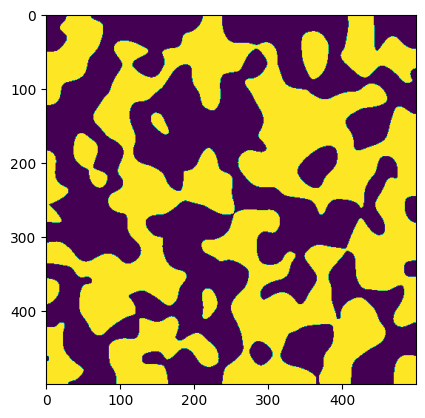

In [40]:
fig2,ax1 = plt.subplots()
im1 = ps.generators.blobs(shape=[500, 500], porosity=0.5, blobiness=1)

ax1.imshow(im1)

In [34]:
im1

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

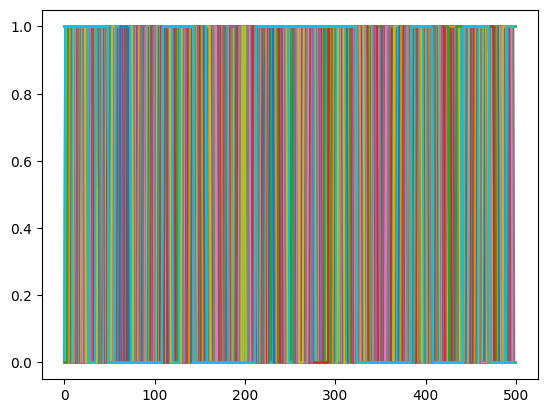

(500, 160)
(500, 800)


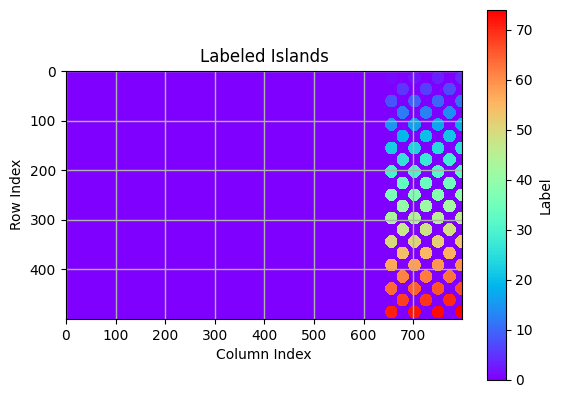

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import porespy as ps

def generate_lattice_spheres(r, nx, ny, bed_value):
    shape = [nx,int(bed_value*ny)]

    o = 1.25 * r
    s = 3.75 * r

    im = ~ps.generators.lattice_spheres(shape=shape, r=r, spacing=s, offset=o, lattice='tri')
    matrix = np.array(im)
    print(matrix.shape)
    teste = np.full([nx, int((1-bed_value)*ny)], False)

    matrix = np.hstack((teste, matrix))
    return matrix

def label_islands(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = [[0] * cols for _ in range(rows)]
    current_label = 0

    def dfs(i, j, label):
        stack = [(i, j)]
        while stack:
            x, y = stack.pop()
            if (0 <= x < rows and 0 <= y < cols and
                    matrix[x][y] and labels[x][y] == 0):
                labels[x][y] = label
                for nx, ny in [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]:
                    stack.append((nx, ny))

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] and labels[i][j] == 0:
                current_label += 1  # Increment label for a new island
                dfs(i, j, current_label)

    return labels


def visualize_labeled_matrix(matrix):
    plt.imshow(matrix, cmap='rainbow', interpolation='none')
    plt.colorbar(label='Label')
    plt.rcParams['axes.facecolor'] = 'white'

    # Adding grid lines
    plt.grid(which='both', linestyle='-', linewidth=1)

    plt.title('Labeled Islands')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')

    plt.show()


matrix = generate_lattice_spheres(12.75,500,800,0.2)
print(matrix.shape)
labels = label_islands(matrix)
visualize_labeled_matrix(labels)

[17:49:11] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=850486;file:///home/andreas/.virtualenvs/lbm-jax/lib/python3.10/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:]8;id=135411;file:///home/andreas/.virtualenvs/lbm-jax/lib/python3.10/site-packages/openpnm/utils/_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

/tmp/ipykernel_5194/3316318105.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) rsa. (This function will be renamed random_spheres in a future version)
  im = ps.generators.rsa(im_or_shape=shape, r=r, clearance=1)


0.508375
(500, 160)
(500, 800)


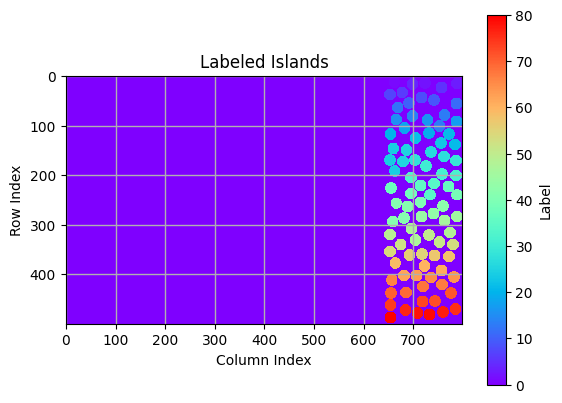

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import porespy as ps

def generate_lattice_spheres(r, nx, ny, bed_value):
    shape = [nx,int(bed_value*ny)]

    o = 1.25 * r
    s = 3.75 * r

    im = ps.generators.rsa(im_or_shape=shape, r=r, clearance=1)
    NX,NY = shape
    matrix = np.array(im)
    porosity = ((NX*NY)-np.sum(im))/(NX*NY)
    print(porosity)
    print(matrix.shape)
    teste = np.full([nx, int((1-bed_value)*ny)], False)

    matrix = np.hstack((teste, matrix))
    return matrix

def label_islands(matrix):
    rows, cols = len(matrix), len(matrix[0])
    labels = [[0] * cols for _ in range(rows)]
    current_label = 0

    def dfs(i, j, label):
        stack = [(i, j)]
        while stack:
            x, y = stack.pop()
            if (0 <= x < rows and 0 <= y < cols and
                    matrix[x][y] and labels[x][y] == 0):
                labels[x][y] = label
                for nx, ny in [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]:
                    stack.append((nx, ny))

    for i in range(rows):
        for j in range(cols):
            if matrix[i][j] and labels[i][j] == 0:
                current_label += 1  # Increment label for a new island
                dfs(i, j, current_label)

    return labels


def visualize_labeled_matrix(matrix):
    plt.imshow(matrix, cmap='rainbow', interpolation='none')
    plt.colorbar(label='Label')
    plt.rcParams['axes.facecolor'] = 'white'

    # Adding grid lines
    plt.grid(which='both', linestyle='-', linewidth=1)

    plt.title('Labeled Islands')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')

    plt.show()


matrix = generate_lattice_spheres(12,500,800,0.2)
print(matrix.shape)
labels = label_islands(matrix)
visualize_labeled_matrix(labels)